## Vector AutoRegression
use to collect information between multiple features as they change over time 


VAR, or Vector Autoregression, is a statistical method used for analyzing the relationships among multiple time series variables. 
Here's a breakdown of what VAR involves:

1. **Vector**: VAR models multiple time series variables together in a vector. For example, if you're studying the economy, you might include variables like GDP growth, inflation rate, unemployment rate, etc., all in one model.

2. **Autoregression**: Each variable in the model is regressed on its own lagged values and the lagged values of all other variables in the system. This means that each variable is explained by its own past values as well as the past values of all other variables in the model.


However, VAR models have some limitations. For instance, `they assume linear relationships between variables and may not capture complex nonlinear dynamics.` Additionally, interpreting the results of VAR models can be challenging, especially when dealing with a large number of variables.


Certainly! Here's a concise explanation of VAR (Vector Autoregression) with key terms:

1. **Vector**: Refers to a collection of multiple time series variables, often denoted as a vector \( y_t \) where \( t \) represents time. For example, in economics, this could include variables like GDP, inflation, and unemployment.

2. **Autoregression**: Each variable in the vector is regressed on its own past values as well as the past values of all other variables in the system. This captures the idea that each variable is influenced not only by its own history but also by the history of other variables in the system.

3. **Order**: Refers to the number of lagged values of each variable included in the model. For example, a VAR(2) model includes two lagged values of each variable.

4. **Parameters**: Coefficients that quantify the relationship between the variables in the model. These are estimated using methods like ordinary least squares (OLS) or maximum likelihood estimation.

5. **Stationarity**: VAR models typically assume that the time series variables are stationary, meaning that their statistical properties do not change over time. This assumption is crucial for the model's validity.

6. **Impulse Response Function (IRF)**: Shows how each variable in the system responds to a one-time shock to one of the variables. It helps in understanding the dynamic interactions between variables over time.

7. **Granger Causality**:  Granger causality suggests that if the past values of one variable (let's call it $X$) can help predict the future values of another variable (let's call it $Y$), then $X$ is said to Granger-cause $Y$.

Granger causality is typically assessed through hypothesis testing. The basic idea is to compare two models: one where both \(X\) and \(Y\) are used to predict the future values of \(Y\), and another where only \(Y\)'s past values are used. If including the past values of \(X\) significantly improves the prediction of \(Y\), then \(X\) is considered to Granger-cause \(Y\).


In summary, VAR models analyze the dynamic relationships between multiple time series variables by regressing each variable on its own past values and the past values of other variables in the system, with the goal of understanding how changes in one variable affect the others over time.


In [1]:

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR



mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/appliance_energy_usage.csv', index_col=0, parse_dates=True)


In [3]:
df

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,,
2016-01-11 17:00:00,60,30,6.600000,733.5,92.000000,7.000000,5.300000,63.000000
2016-01-11 17:10:00,60,30,6.483333,733.6,92.000000,6.666667,5.200000,59.166667
2016-01-11 17:20:00,50,30,6.366667,733.7,92.000000,6.333333,5.100000,55.333333
2016-01-11 17:30:00,50,40,6.250000,733.8,92.000000,6.000000,5.000000,51.500000
2016-01-11 17:40:00,60,40,6.133333,733.9,92.000000,5.666667,4.900000,47.666667
...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,22.733333,755.2,55.666667,3.333333,13.333333,23.666667
2016-05-27 17:30:00,90,0,22.600000,755.2,56.000000,3.500000,13.300000,24.500000
2016-05-27 17:40:00,270,10,22.466667,755.2,56.333333,3.666667,13.266667,25.333333


In [4]:
df = df.resample('H').mean()

In [5]:
df

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,6.308333,733.750000,92.000000,6.166667,5.050000,53.416667
2016-01-11 18:00:00,176.666667,51.666667,5.941667,734.266667,91.583333,5.416667,4.658333,40.000000
2016-01-11 19:00:00,173.333333,25.000000,6.000000,734.791667,89.750000,6.000000,4.391667,40.000000
2016-01-11 20:00:00,125.000000,35.000000,6.000000,735.283333,87.583333,6.000000,4.016667,40.000000
2016-01-11 21:00:00,103.333333,23.333333,5.833333,735.566667,87.416667,6.000000,3.816667,40.000000
...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,101.666667,1.666667,21.916667,755.800000,59.000000,2.000000,13.475000,21.583333
2016-05-27 15:00:00,76.666667,0.000000,22.216667,755.675000,57.333333,2.000000,13.258333,21.833333
2016-05-27 16:00:00,135.000000,0.000000,22.883333,755.375000,55.000000,2.416667,13.283333,22.583333


### NOTE:
The 'C' in 'C'+str(i) refers to the default color cycle in Matplotlib. By appending a number to 'C', you're essentially asking Matplotlib to use the color at the corresponding position in the color cycle for the current item you're plotting. The str(i) part converts the index i to a string, so it can be concatenated with 'C'.

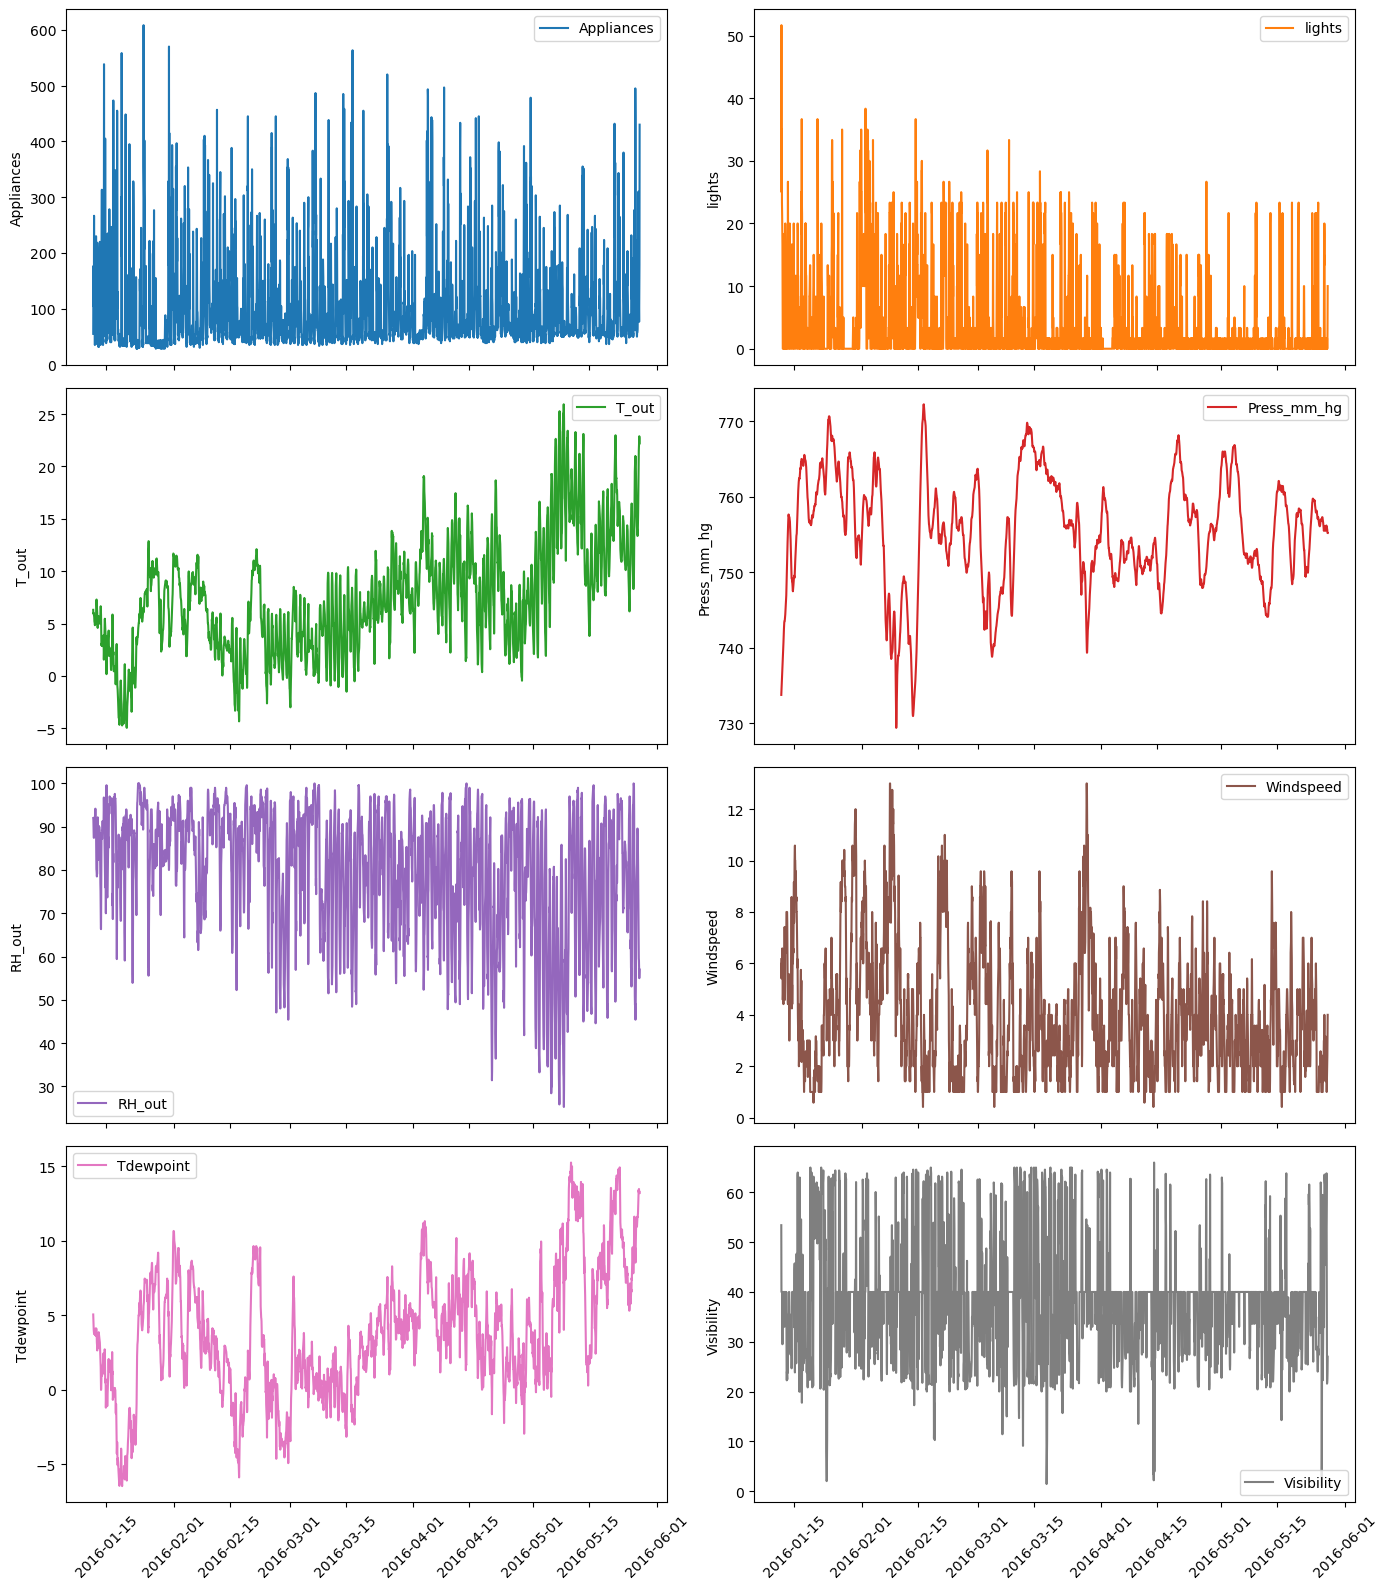

In [25]:
features = df.columns.tolist()

# Set up the plot grid
fig, axs = plt.subplots(4, 2, figsize=(14, 16), sharex=True)

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate through each feature and plot
for i, feature in enumerate(features):
    axs[i].plot(df.index, df[feature], label=feature, color= 'C'+str(i))
    axs[i].set_ylabel(feature)
    axs[i].legend()
    axs[i].tick_params(axis='x', rotation=45)
    

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [30]:
for i in range(len(df.columns)):
    result = adfuller(df[df.columns[i]])

    if result[1] > 0.05:
        print('Series is not stationary', df.columns[i])
    else:
        print('Series is stationary', df.columns[i])

Series is stationary Appliances
Series is stationary lights
Series is stationary T_out
Series is stationary Press_mm_hg
Series is stationary RH_out
Series is stationary Windspeed
Series is stationary Tdewpoint
Series is stationary Visibility


In [31]:
max_lags = 8
y = 'Appliances'

### NOTE:
using Granger causes to check which parameter causes appliance value to change

Based on the results, we look at the p_values, and see for which feature the values are less than 0.05 at all lags. SO we see for T_out and Windspeed, we get that condition that p_values are less than 0.05 which means we reject the null hypothesis.

In [35]:
# Appliances (the target) is in the first column and we dont to use it to run Granger test.

for i in range(len(df.columns) - 1):
    results = grangercausalitytests(df[[y, df.columns[i + 1]]], max_lags, verbose = False)
    
    p_values = [round(results[i+1][0]['ssr_ftest'][1], 4) for i in range(max_lags)]
    print('Column - {} : P_values - {}'.format(df.columns[i+1], p_values))

/Users/pragya/miniconda3/envs/hands_on_ml/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/pragya/miniconda3/envs/hands_on_ml/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/pragya/miniconda3/envs/hands_on_ml/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/pragya/miniconda3/envs/hands_on_ml/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Column - lights : P_values - [0.1451, 0.0005, 0.0001, 0.0002, 0.0001, 0.0001, 0.0006, 0.0012]
Column - T_out : P_values - [0.002, 0.0001, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - Press_mm_hg : P_values - [0.0985, 0.1956, 0.0351, 0.0016, 0.0, 0.0001, 0.0, 0.0]
Column - RH_out : P_values - [0.0, 0.0004, 0.0004, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - Windspeed : P_values - [0.0004, 0.0041, 0.0094, 0.0082, 0.0163, 0.0119, 0.0009, 0.0002]
Column - Tdewpoint : P_values - [0.4348, 0.4494, 0.5005, 0.3887, 0.05, 0.0694, 0.0992, 0.1152]
Column - Visibility : P_values - [0.7071, 0.5372, 0.7338, 0.8265, 0.544, 0.3324, 0.2521, 0.3465]


/Users/pragya/miniconda3/envs/hands_on_ml/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/pragya/miniconda3/envs/hands_on_ml/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/pragya/miniconda3/envs/hands_on_ml/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [36]:
df_input = df[['Appliances', 'T_out', 'Windspeed' ]]

In [38]:
df_train = df_input[: int(0.9 * (len(df_input)))]
df_test = df_input[int(0.9 * (len(df_input))) : ]


In [39]:
df_train.shape

(2961, 3)

In [40]:
df_test.shape

(329, 3)

### NOTE:
now we have 3 features for which we are running VAR. So, we will have linear regression model for each of these 3 paramters with dependence on the other two.

![link text](https://wikimedia.org/api/rest_v1/media/math/render/svg/d79bead4e9192d7fe2470a7936e4623e9ff252e1)

![link text](https://wikimedia.org/api/rest_v1/media/math/render/svg/d88ac4002c0641b2e93fb6d35f961ea63352b6a9)

In order to find the lag at which the dependence is the most, we run it on many lags, and see for which the metric is the least

**Lag length is often determined using statistical tests, such as the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), or likelihood ratio tests. These tests evaluate the trade-off between model fit and complexity and help identify the optimal lag length for the VAR model.**

Overall, determining the appropriate lag length in a VAR model is essential for ensuring that the model accurately captures the relationships between variables, produces reliable forecasts, and remains interpretable.

In [41]:
model = VAR(df_train, freq = '1H')
for i in range(48):
    results = model.fit(i + 1)
    print("Order = ", i + 1)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)

Order =  1
AIC:  7.126785098024289
BIC:  7.151080819162065
Order =  2
AIC:  6.13876916892782
BIC:  6.181298651759994
Order =  3
AIC:  6.019982255185911
BIC:  6.080755770837745
Order =  4
AIC:  5.960526790759721
BIC:  6.039554619733088
Order =  5
AIC:  5.908069667837069
BIC:  6.005362100022207
Order =  6
AIC:  5.891197292905783
BIC:  6.006764627593055
Order =  7
AIC:  5.85225035501184
BIC:  5.986102900903522
Order =  8
AIC:  5.841915871050663
BIC:  5.99406394627274
Order =  9
AIC:  5.827889041110309
BIC:  5.998342973224303
Order =  10
AIC:  5.825120732509797
BIC:  6.013890858524603
Order =  11
AIC:  5.7910831470243345
BIC:  5.998179813408082
Order =  12
AIC:  5.78322849534456
BIC:  6.008662058036488
Order =  13
AIC:  5.764122425516564
BIC:  6.00790324993892
Order =  14
AIC:  5.754516806234101
BIC:  6.016655267304057
Order =  15
AIC:  5.745057263179905
BIC:  6.025563745321492
Order =  16
AIC:  5.734159567395153
BIC:  6.033044464551212
Order =  17
AIC:  5.734437324119505
BIC:  6.051711039

In [42]:
model.select_order(48).summary()

,AIC,BIC,FPE,HQIC
0,13.82,13.83,1.005e+06,13.82
1,7.139,7.163,1260.,7.148
2,6.149,6.192,468.3,6.165
3,6.031,6.093,416.2,6.053
4,5.970,6.050,391.7,5.999
5,5.917,6.015,371.3,5.952
6,5.902,6.019,365.7,5.944
7,5.863,5.999*,351.9,5.912
8,5.852,6.006,348.1,5.908
9,5.837,6.010,342.9,5.900


In [44]:
# NOTE: WE ARE CHOOSING LAG 7 AS THE BIC METRIC IS LOWEST HERE (SEE ABOVE)

model = VAR(df_train, freq = '1H')
results = model.fit(7)

In [45]:
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 18, Apr, 2024
Time:                     06:25:31
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    5.98610
Nobs:                     2954.00    HQIC:                   5.90043
Log likelihood:          -21152.4    FPE:                    348.017
AIC:                      5.85225    Det(Omega_mle):         340.356
--------------------------------------------------------------------
Results for equation Appliances
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                37.865935         3.448219           10.981           0.000
L1.Appliances         0.451436         0.018470           24.442           0.000
L1.T_out              2.328238         2.534185        

In [46]:
lag = results.k_ar

In [47]:
results.forecast(df_train.values[-lag:], steps = 5)

array([[44.34598018,  8.92651619,  3.99333186],
       [33.70923187,  8.81719814,  4.13871016],
       [38.32344216,  9.01953267,  4.188856  ],
       [53.39756915,  9.3356185 ,  4.31429082],
       [60.93798924,  9.56974211,  4.40093836]])

### NOTE:
what we are doing above is, using the last 7 values (based on the number of lags) to predcict the future values. Here, we see predict next 5 values

In [48]:
df_test[0:5]

,Appliances,T_out,Windspeed
date,,,
2016-05-14 02:00:00,60.000000,8.891667,3.166667
2016-05-14 03:00:00,60.000000,8.725000,2.833333
2016-05-14 04:00:00,60.000000,8.775000,4.416667
2016-05-14 05:00:00,56.666667,8.683333,5.000000
2016-05-14 06:00:00,63.333333,8.716667,5.000000


In [51]:
pd.DataFrame([results.params['Appliances'], results.pvalues['Appliances']])

,const,L1.Appliances,L1.T_out,L1.Windspeed,L2.Appliances,L2.T_out,L2.Windspeed,L3.Appliances,L3.T_out,L3.Windspeed,...,L4.Windspeed,L5.Appliances,L5.T_out,L5.Windspeed,L6.Appliances,L6.T_out,L6.Windspeed,L7.Appliances,L7.T_out,L7.Windspeed
Appliances,3.786593e+01,4.514365e-01,2.328238,2.268735,2.222793e-01,-4.372626,-1.481847,-0.019489,5.606923,0.184615,...,-0.086856,0.007386,5.171913,-1.990310,-0.016838,3.227034,4.971647,-0.010919,-6.777338,-2.972593
Appliances,4.701032e-28,6.138160e-132,0.358235,0.256413,4.255512e-28,0.430243,0.660333,0.345467,0.395279,0.959896,...,0.981654,0.720872,0.433306,0.587754,0.405977,0.563227,0.139649,0.555442,0.008064,0.135883


In [52]:
pd.DataFrame([results.params['Appliances'], results.pvalues['Appliances']]).T

,Appliances,Appliances
const,37.865935,4.701032e-28
L1.Appliances,0.451436,6.138160e-132
L1.T_out,2.328238,3.582355e-01
L1.Windspeed,2.268735,2.564126e-01
L2.Appliances,0.222279,4.255512e-28
L2.T_out,-4.372626,4.302427e-01
L2.Windspeed,-1.481847,6.603327e-01
L3.Appliances,-0.019489,3.454670e-01
L3.T_out,5.606923,3.952787e-01
L3.Windspeed,0.184615,9.598961e-01


In [53]:
df_coeff = pd.DataFrame([results.params['Appliances'], results.pvalues['Appliances']]).T

In [54]:
df_coeff.columns = ['coeff', 'pval']

In [58]:
df_coeff.query('pval < 0.05')

,coeff,pval
const,37.865935,4.701032e-28
L1.Appliances,0.451436,6.138160e-132
L2.Appliances,0.222279,4.255512e-28
L4.Appliances,-0.043691,3.442733e-02
L7.T_out,-6.777338,8.064473e-03


In [59]:
# its like an if-else condition, when the values is less than 0.05, it returns 1 or else 0
np.where(df_coeff['pval'] < 0.05, 1, 0)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [60]:
df_coeff['valid'] = np.where(df_coeff['pval'] < 0.05, 1, 0)

In [61]:
df_coeff

,coeff,pval,valid
const,37.865935,4.701032e-28,1
L1.Appliances,0.451436,6.138160e-132,1
L1.T_out,2.328238,3.582355e-01,0
L1.Windspeed,2.268735,2.564126e-01,0
L2.Appliances,0.222279,4.255512e-28,1
L2.T_out,-4.372626,4.302427e-01,0
L2.Windspeed,-1.481847,6.603327e-01,0
L3.Appliances,-0.019489,3.454670e-01,0
L3.T_out,5.606923,3.952787e-01,0
L3.Windspeed,0.184615,9.598961e-01,0


In [63]:
# taking from 1 because we are not using the constant in the y = mx + c equation

coeff_arr = df_coeff['coeff'][1:].values

In [64]:
coeff_arr

array([ 0.45143647,  2.32823846,  2.26873466,  0.2222793 , -4.37262576,
       -1.48184722, -0.01948858,  5.60692324,  0.18461514, -0.04369054,
       -5.43530357, -0.08685622,  0.00738616,  5.17191268, -1.99030973,
       -0.01683822,  3.22703425,  4.97164661, -0.01091878, -6.77733848,
       -2.97259279])

In [66]:
df_train[-lag:][::-1]

,Appliances,T_out,Windspeed
date,,,
2016-05-14 01:00:00,63.333333,9.333333,4.000000
2016-05-14 00:00:00,58.333333,9.791667,5.750000
2016-05-13 23:00:00,61.666667,10.466667,7.583333
2016-05-13 22:00:00,55.000000,11.850000,6.833333
2016-05-13 21:00:00,63.333333,14.116667,6.583333
2016-05-13 20:00:00,120.000000,17.066667,8.166667
2016-05-13 19:00:00,208.333333,19.333333,9.000000


In [69]:
df_train[-lag:][::-1].stack()

date                           
2016-05-14 01:00:00  Appliances     63.333333
                     T_out           9.333333
                     Windspeed       4.000000
2016-05-14 00:00:00  Appliances     58.333333
                     T_out           9.791667
                     Windspeed       5.750000
2016-05-13 23:00:00  Appliances     61.666667
                     T_out          10.466667
                     Windspeed       7.583333
2016-05-13 22:00:00  Appliances     55.000000
                     T_out          11.850000
                     Windspeed       6.833333
2016-05-13 21:00:00  Appliances     63.333333
                     T_out          14.116667
                     Windspeed       6.583333
2016-05-13 20:00:00  Appliances    120.000000
                     T_out          17.066667
                     Windspeed       8.166667
2016-05-13 19:00:00  Appliances    208.333333
                     T_out          19.333333
                     Windspeed       9.000000
dt

In [70]:
df_train[-lag:][::-1].stack().to_frame()

0
date                                      
2016-05-14 01:00:00 Appliances   63.333333
                    T_out         9.333333
                    Windspeed     4.000000
2016-05-14 00:00:00 Appliances   58.333333
                    T_out         9.791667
                    Windspeed     5.750000
2016-05-13 23:00:00 Appliances   61.666667
                    T_out        10.466667
                    Windspeed     7.583333
2016-05-13 22:00:00 Appliances   55.000000
                    T_out        11.850000
                    Windspeed     6.833333
2016-05-13 21:00:00 Appliances   63.333333
                    T_out        14.116667
                    Windspeed     6.583333
2016-05-13 20:00:00 Appliances  120.000000
                    T_out        17.066667
                    Windspeed     8.166667
2016-05-13 19:00:00 Appliances  208.333333
                    T_out        19.333333
                    Windspeed     9.000000

In [76]:
df_train[-lag:][::-1].stack().to_frame().T.values

array([[ 63.33333333,   9.33333333,   4.        ,  58.33333333,
          9.79166667,   5.75      ,  61.66666667,  10.46666667,
          7.58333333,  55.        ,  11.85      ,   6.83333333,
         63.33333333,  14.11666667,   6.58333333, 120.        ,
         17.06666667,   8.16666667, 208.33333333,  19.33333333,
          9.        ]])

In [77]:
# we are doing [::-1] as the coeff_arr is for lag 1, lag 2, ...so the most recent value should be on top 
in_arr = df_train[-lag:][::-1].stack().to_frame().T.values

In [78]:
# these are the x-values 
in_arr.shape

(1, 21)

In [79]:
# these are the coefficients
coeff_arr.shape

(21,)

In [80]:
# in order to do the linear fit, we have to the dot product between the x and coefficient (y = mx + c)
np.dot(in_arr, coeff_arr) + df_coeff['coeff'][:1].values

array([44.34598018])

In [83]:
df_coeff['coeff'][:1].values

array([37.86593472])